In [1]:
import numpy as np
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plot
import random
# Can be done with math


# Bernoulli generator

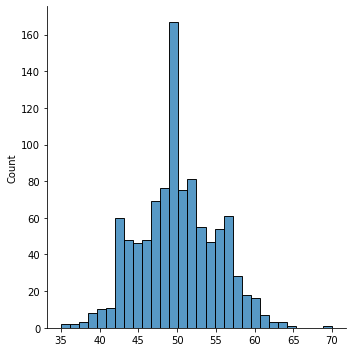

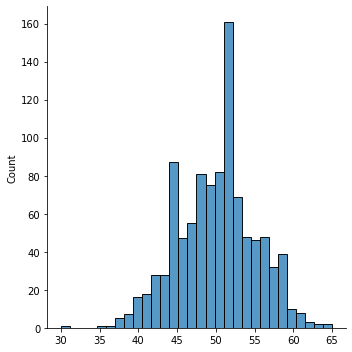

In [2]:
trails = 100
p = 0.5
samples = 1000

sample = np.random.binomial(trails,p,samples)
negsample = [100 - x for x in sample]
sns.displot(sample)
sns.displot(negsample)
# Both of the graphs

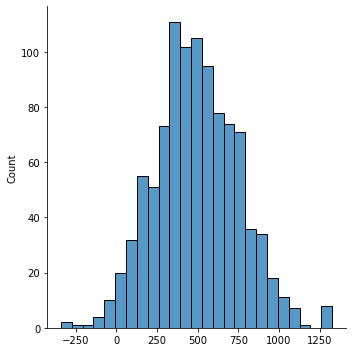

In [3]:
# Normal Distribution for comparison
sample = np.random.normal(500,0.5*1000*0.5,1000)
sns.displot(sample)


<Axes: xlabel='n/N', ylabel='Sum'>

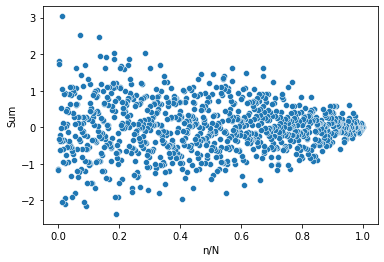

In [4]:
# Show the convergence thing
def run(n):
    sample = np.random.binomial(1,0.5,n)
    iid = [-1 if b == 0 else b for b in sample]
    gain = sum(iid)
    return gain
# Defined the Big N
big_N = 1000
run_count = np.arange(big_N)

x_val = [x/big_N for x in run_count]
y_val = [run(x)*(1/math.sqrt(big_N)) for x in run_count]

data = pd.DataFrame({'n/N': list(reversed(x_val))
, 'Sum': y_val})
sns.scatterplot(x='n/N', y='Sum', data=data)


# Symmetry property
### Bernouille scheme
A Bernouille scheme generator is a generalised version of a Bernouille experiemnt. Instead of successa nd failure, multplie possible outcomes, each with a possible weight, whose sum is equal to 1, are considered. 
This generator was acheived by having two lists, one of outcomes, the other of weights. Selection of the outcomes was decided through the weights

As an example, the graph below represents 100 trails with the following Bernouille scheme:
Values = 1, 2, 3, 4, 5
Probabilities = 0.2, 0.3, 0.1, 0.2, 0.2
If we divide the count by 100, we find the probabilities again

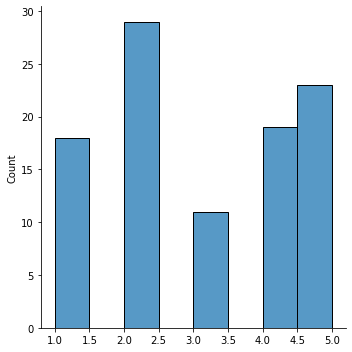

In [5]:
# Generation of Bernouille Scheme
# List of Possible Values
# List of probability of picking value
def berScheme(values,prob):
    if sum(prob) != 1:
        print("Error, not valid")
    return np.random.choice(values, p=prob)

vals = [1,2,3,4,5]
prob = [0.2,0.3,0.1,0.2,0.2]

data = [berScheme(vals,prob) for x in range(100)]
sns.displot(data)

### Cantor Distribution
The Cantor distribution holds a number of inuntitive properties, and can be generated with the following apporach:
C0 = [0,1]
Cn = (C(n-1) union (C(n-1) + 2))/3
This gives it a very unusual shape

<Axes: ylabel='Proportion'>

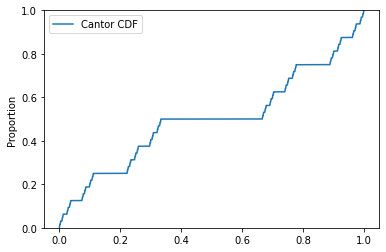

In [6]:
# Part two, symmetry property

# Use this for Cantor Distribution
# Generate Cantor for step n
def Cantor(n):
    if n == 0:
        return np.array([0,1])
    antecedent = Cantor(n-1)
    antecedentR = [x + 2 for x in antecedent]
    joined = np.concatenate((antecedent, antecedentR))
    return [x /3.0 for x in joined]


# Show property being verified
data = Cantor(10)


data_preproc = pd.DataFrame({ 
        'Cantor CDF': np.array(data)
})

sns.ecdfplot(data=data_preproc)

#### Symmetry property:
If we graph the density function of X and (1-X, we can see they overlap perfectly

<Axes: ylabel='Proportion'>

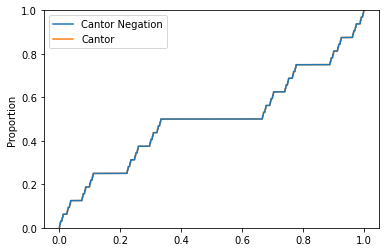

In [7]:
# Symmetry property. Graphing the symmetry shows they have the same CDF?
data_preproc = pd.DataFrame({ 
    'Cantor Negation': np.array([1 - x for x in data]),
    'Cantor': np.array(data)
})

sns.ecdfplot(data=data_preproc)

### Self Similarity:
We can demonstrate the self similarity in the cantor distribution doing the following:
Getting the distribution for n
Getting the first third (all entries below 1/3)
Multiplying all entries by 3.
If we do this, we will find the cantor distribution for n - 1
We can see in the figuer below that these two distributions are the same

<Axes: ylabel='Proportion'>

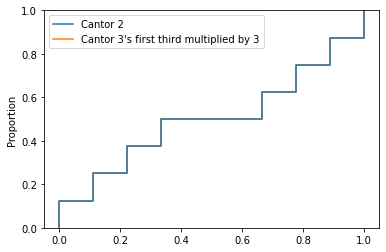

In [8]:
similarity = Cantor(3)
sim = [x*3 for x in similarity if x < 0.4333333]

data_preproc = pd.DataFrame({ 
        'Cantor 2': np.array(Cantor(2)),
        'Cantor 3\'s first third multiplied by 3': np.array(sim)
})

sns.ecdfplot(data=data_preproc)

### Cantor with over 1000 points:

Number of points:  2048


<Axes: ylabel='Proportion'>

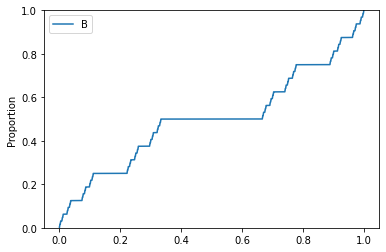

In [9]:
# Cantor big boi
data = Cantor(10)
print("Number of points: ", len(data))

data_preproc = pd.DataFrame({ 
        'B': np.array(data)
})

sns.ecdfplot(data=data_preproc)

# From One Distribution to Another:

### Exponential and poisson
The exponential and poisson distribution have an interesting realtion. The probability density function of Exp can model the waiting time between successive poisson hits. Poisson models the number of hits. 
With the same lambda, we can graph both of the pdfs made by our generators.

<Axes: ylabel='Density'>

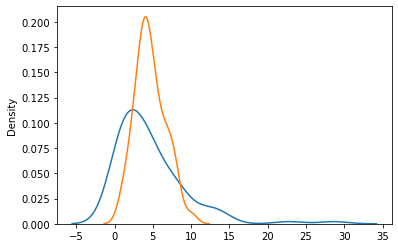

In [10]:
# Exponential distribution generator
exp = np.random.default_rng().exponential(scale=5, size=100)
pois = np.random.default_rng().poisson(lam=5, size=100)

sns.kdeplot(exp) # PDf of exponential, aka Waiting time between successive hits
sns.kdeplot(pois) # Number of hits in time

# Poisson distribution generator
# X^2 generator

### Sampling Gaussian with Polar Methods
We used the Marsaglia polar method to generate points for our gaussian distribution.
We pick random points X Y from U 0,1 until the sum of their squares is greater than 1
We then return the mean + the standard deviation times x and y
This works because of the following property:
The point (cos(2πu), sin(2πu)) is uniformly distributed on the unit circumference x^2 + y^2 = 1
Multiplying that by a random variable p will produce p\*cos(2πu), p\*sin(2πu))
whose coordinates are jointly distributed as two independent standard normal random variables

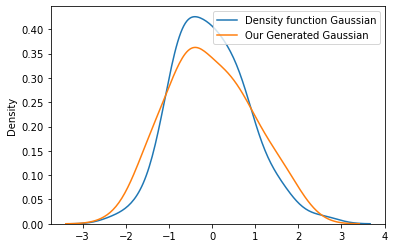

In [11]:
# Sample to get Gaussian with Marsaglia polar method
# code translated from https://en.wikipedia.org/wiki/Marsaglia_polar_method

has_spare = False
spare = 0
def generate_gaussian(mean, std):
    if has_spare:
        return spare * mean * std
    u = 0
    v = 0
    s = 0
    while(s >= 1 or s == 0):
        u = random.random() * 2 -1
        v = random.random() * 2 -1
        s = u * u + v * v
    s = math.sqrt(-2 * math.log(s)/s)
    spare = v * s
    hasSpare = True
    return mean + std * u * s

# generate points!
num=100
mean = 0
std = 1
norm = np.random.default_rng().normal(loc=0.0, scale=1.0, size=num)

our_norm = [generate_gaussian(mean, std) for x in range(num)]
sns.kdeplot(norm) # 
sns.kdeplot(our_norm) # Number of hits in time
plot.legend(labels=['Density function Gaussian', 'Our Generated Gaussian'])

# Plot against normal distribution?

### Chi Squared
Using the following equation:
When x > 0:
(x)^(k/2 -1) * e ^(-x/2)
/
2^(k/2) * gamma(k/2)

otherwise 0
Where gamma is a gamma function
The gamma function is gamme(n) = (n-1)!

We can get the value for a point x and degreee of freedom k. Graphing different degrees of freedom, we get the following graph:

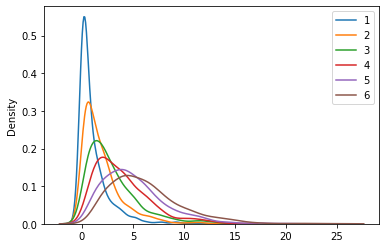

In [12]:
# Have wikipedia to explain prob density function
big_num = 1000
chi_square1 = np.random.default_rng().chisquare(1,size=big_num)
chi_square2 = np.random.default_rng().chisquare(2,size=big_num)
chi_square3 = np.random.default_rng().chisquare(3,size=big_num)
chi_square4 = np.random.default_rng().chisquare(4,size=big_num)
chi_square5 = np.random.default_rng().chisquare(5,size=big_num)
chi_square6 = np.random.default_rng().chisquare(6,size=big_num)

sns.kdeplot(chi_square1)
sns.kdeplot(chi_square2)
sns.kdeplot(chi_square3)
sns.kdeplot(chi_square4)
sns.kdeplot(chi_square5)
sns.kdeplot(chi_square6)
plot.legend(labels=['1', '2','3','4','5','6'])

# LLN and CLT 

The Law of large numbers describes how the average result obtained from a large number of trails tends to get closer and closer to the expected value as more trails are performed.
The chart below shows us an example of this, with the Noraml 1,1 distribution converging it's mean to 1 

<Axes: xlabel='n', ylabel='Mean'>

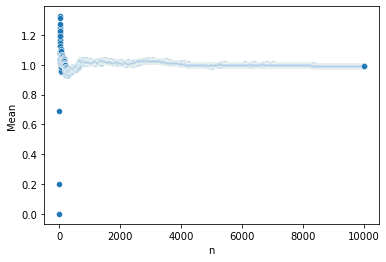

In [13]:
# Empirical Verification of law of large number
big_N = 10000
norm = np.random.default_rng().normal(loc=1.0, scale=1.0, size=big_N)
run_list = np.arange(big_N)
sums = np.zeros(big_N)


# First we want to get the sum for every point until small n, divded by n
for i in range(big_N):
    sn = sum(norm[:i])
    sums[i] = sn/(i+1)

x_val = []
y_val = []
data = pd.DataFrame({'n': run_list
, 'Mean': sums})
sns.scatterplot(x='n', y='Mean', data=data)

# Investigate some other things

Central limit theorem meanwhile describes how repeated sampling from any distribution approaches the normal distribution around the mean. 
In this example, we are sampling from the binomail distribution, with Bin (0.5, 10)
The purple line represents the expected value. 

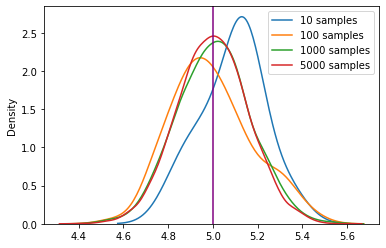

In [14]:
# Central limit theorem
# Show that different ditro tends towards normal
# Change to a different distribution and the like!
big_N = 100
other_N=100 
n = 10
p = 0.5
a = n * p
b = math.sqrt(n*p*(1-p))

def sample_binomail():
    output = np.random.default_rng().binomial(n,p, size=100)
    return output

run_list = np.arange(big_N)
sums = np.zeros(big_N)

# First we want to get the sum for every point until small n, divded by n
def sample_mean(runs):
    output = np.zeros(runs)
    for i in range(runs):
        sample = sample_binomail()
        sample_m = np.mean(sample)
        output[i] = sample_m
    return output


two_samples = sample_mean(10)
ten_samples = sample_mean(100)
twentry_samples = sample_mean(1000)
thirty_samples = sample_mean(5000)

sns.kdeplot(two_samples)
sns.kdeplot(ten_samples)
sns.kdeplot(twentry_samples)
sns.kdeplot(thirty_samples)
#sns.kdeplot(np.random.default_rng().normal(loc=a, scale=b, size=100))
plot.legend(labels=['10 samples', '100 samples', '1000 samples', '5000 samples', 'Normal Distribution'])
plot.axvline(x=5.0,color='purple', label='Expected Mean')


In [15]:

# Plot standard deviations:
stdev1 = np.std(two_samples)
stdev2 = np.std(ten_samples)
stdev3 = np.std(twentry_samples)
stdev4 = np.std(thirty_samples)
print(stdev1)
print(stdev2)
print(stdev3)
print(stdev4)
print(b)

0.133176574516692
0.17891048040849927
0.1634085674008557
0.15820146900708604
1.5811388300841898


# Unit Simplex

Two different approaches for sampling where used.
Approach 1, which resulted in uniform sampling came from:http://blog.geomblog.org/2005/10/sampling-from-simplex.html
We sample a size under (n-1 numbers) between 0 and 1  then append 0 and 1 to the sample, so as to havea n + 1 samples
We sort it, and use the different between entries to generate our sample. This ensures that we are sampling uniformly inside the simplex outlined. 
All points have an equal chance of being sampled with this method
The graph Below shows the results:

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


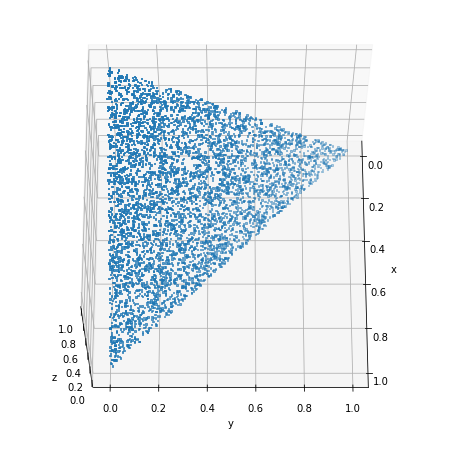

In [16]:
# Unit simplex (To get two more points)
# https://cs.stackexchange.com/questions/3227/uniform-sampling-from-a-simplex
# http://blog.geomblog.org/2005/10/sampling-from-simplex.html
def runif_in_simplex(n):
  ''' Return uniformly random vector in the n-simplex '''

  k = np.random.exponential(scale=1.0, size=n)
  return k / sum(k)
# Source = https://cs.stackexchange.com/questions/3227/uniform-sampling-from-a-simplex
def simplex_sample(n):
    k = np.random.uniform(size=(n-1))
    full_list = np.sort(np.concatenate((k, [0,1])))
    output = np.zeros(n)
    for i in range(n):
        output[i] = full_list[i + 1] - full_list[i]
    return output
    

number =5000
x = np.zeros(number)
y = np.zeros(number)
z = np.zeros(number)

for i in range(number):
    sample = simplex_sample(3)
    x[i] = sample[0]
    y[i] = sample[1]
    z[i] = sample[2]

plot.figure(figsize=(8,8))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(x, y, z,marker=",",s=2)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
axes.view_init(65, 0)
plot.show()



Approach 2 was similar, but does not result in a uniform distribution
We sample the n dimension cube (and therefor ignore x + y + z = 1) and then normalise our sample to fit the rule
This favors the center. This approach can be corrected if x y and z are sampled from the exponential distribution instead. The next graph shows the non-uniform sample

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


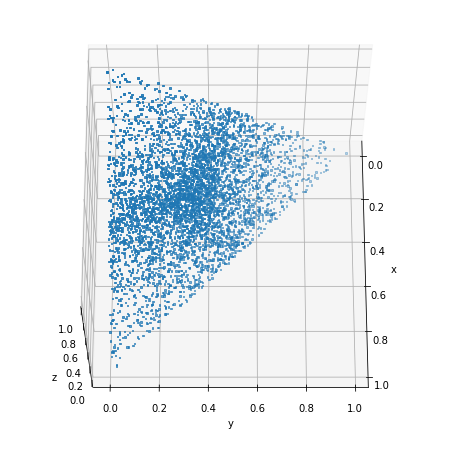

In [17]:
def simplex_sample_bad(n):
    k = np.random.uniform(size=n)
    div = sum(k)
    output = [x/div for x in k]
    return output

number =5000
x = np.zeros(number)
y = np.zeros(number)
z = np.zeros(number)

for i in range(number):
    sample = simplex_sample_bad(3)
    x[i] = sample[0]
    y[i] = sample[1]
    z[i] = sample[2]

plot.figure(figsize=(8,8))
axes = plot.axes(projection='3d')
print(type(axes))
axes.scatter3D(x, y, z,marker=",",s=2)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
axes.view_init(65, 0)
plot.show()
